# PCA


In [43]:
# For reading data sets from the web.
import pandas
# For lots of great things.
import numpy as np
# To make our plots.
import matplotlib.pyplot as plt
%matplotlib inline
# Because sympy and LaTeX make
# everything look wonderful!
from sympy import *
init_printing(use_latex=True)
from IPython.display import display
# We will use this to check our implementation...
from sklearn.decomposition import PCA
# We will grab another data set using Keras
# after we finish up with Iris...
import keras
from sklearn import preprocessing

In [44]:
## load in data and split into x train and y train
data = np.array(pandas.read_csv("new_trainingdata.csv", header=0))
## Have to drop all teh rows that have nan values because they will not help with net
## clean out rows with nan values
data = data[~np.isnan(data).any(axis=1)]
print(data[:8])
data.shape

[[-46.28571429 -45.125      -47.14285714 -49.28571429 -55.5
  -54.85714286 -57.75       -59.125        0.        ]
 [-46.         -45.88888889 -46.55555556 -51.         -56.375
  -55.44444444 -58.11111111 -57.88888889   0.        ]
 [-45.88888889 -46.375      -49.55555556 -49.625      -56.22222222
  -54.88888889 -55.77777778 -58.77777778   0.        ]
 [-45.2        -49.2        -55.66666667 -55.33333333 -54.
  -55.         -51.66666667 -62.22222222   0.        ]
 [-46.         -49.         -57.         -55.33333333 -53.25
  -54.11111111 -52.11111111 -62.22222222   0.        ]
 [-46.33333333 -49.5        -56.75       -56.75       -53.5
  -55.44444444 -51.44444444 -61.44444444   0.        ]
 [-46.55555556 -49.         -55.42857143 -55.2        -53.66666667
  -54.66666667 -52.55555556 -61.88888889   0.        ]
 [-45.55555556 -48.         -56.66666667 -56.5        -53.88888889
  -55.66666667 -53.11111111 -62.33333333   0.        ]]


In [45]:
# vectors AND class labels...
X = data[:,0:8] # 0 thru 30
Y = data[:,8] # 30

# standardize X .. will mean center data
X = preprocessing.scale(X)

# Pretty-print with display()!
display(X.shape)
display(Y.shape)
display(Matrix(np.unique(Y)).T)
display(X[0:8])

[0.0  1.0  2.0]

array([[-0.3092873 ,  0.44011108,  0.63664779,  0.1816632 , -1.49788926,
        -0.75873607, -1.98651828,  0.11548844],
       [-0.13867241,  0.03796099,  0.76509571, -0.20275434, -1.79786928,
        -1.13764933, -2.19837621,  0.62769181],
       [-0.07232217, -0.21795271,  0.10896985,  0.10558057, -1.74549182,
        -0.77921787, -0.82944808,  0.25936579],
       [ 0.33904929, -1.70517687, -1.22758282, -1.17447646, -0.98363779,
        -0.85090416,  1.58247291, -1.16789753],
       [-0.13867241, -1.59988666, -1.51919432, -1.17447646, -0.72651206,
        -0.27741382,  1.3217247 , -1.16789753],
       [-0.33772312, -1.86311217, -1.46451716, -1.49215485, -0.81222064,
        -1.13764933,  1.71284702, -0.84561226],
       [-0.47042359, -1.59988666, -1.17550934, -1.14457732, -0.86935969,
        -0.63584529,  1.06097648, -1.02977527],
       [ 0.12672854, -1.07343563, -1.44629144, -1.43609395, -0.94554509,
        -1.28102192,  0.73504121, -1.21393828]])

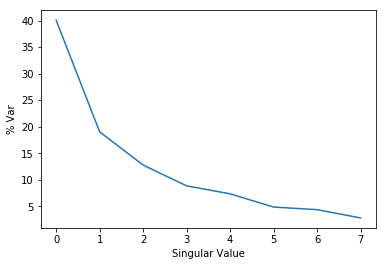

In [46]:
U,S,V = np.linalg.svd(X,full_matrices=True)

# Percent variance accounted for
plt.plot(100.0*S/np.sum(S))
plt.ylabel('% Var')
plt.xlabel('Singular Value')
plt.show()

In [47]:
# Variance accounted for in the first two principal components
100.0*(S[0]+S[1])/np.sum(S)

In [48]:
# Scale the singular vectors, resulting in a rotated form of our mean-centered data
D = np.zeros([X.shape[0],X.shape[1]])
np.fill_diagonal(D,S)
Xrotated = np.dot(U,D)
# Extract just the first two principal components!
PCs = Xrotated[:,0:2]
PCs.shape

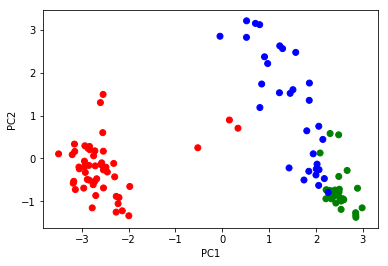

In [49]:
# The x and y values come from the two
# Principal Components and the colors for
# each point are selected based on the
# corresponding class for each point...
plt.scatter(PCs[:,0],PCs[:,1],
color=[['red','green','blue'][i] for i in Y.astype(int)])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

The data suggest that we have fairly clearly descision boundries.  A simple MLP with linear activation functions should have no trouble classifying our locations but if it does we will likely use a RELU or sigmoid instead.  It remains to be seen how well the network will be able to generalize.